In [24]:
import rmgpy
import rmg
import numpy as np
from rmgpy.data.rmg import RMGDatabase
from rmgpy import settings
from rmgpy.molecule import Molecule
from rmgpy.species import Species
from rmgpy.thermo.thermoengine import submit
import os
path = os.path.join(settings['database.directory'],'thermo')
database = RMGDatabase()
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
database.load_thermo(path=path,thermo_libraries=['primaryThermoLibrary','surfaceThermoPt111','thermo_DFT_CCSDTF12_BAC','DFT_QCI_thermo'],
              surface=True)

In [52]:
old_thermo = rmgpy.chemkin.load_chemkin_file('../cpox/rh/chemkin/chem_annotated-surface.inp',
                                dictionary_path='../cpox/rh/chemkin/species_dictionary.txt',
                                read_comments=False)

new_thermo = rmgpy.chemkin.load_chemkin_file('./rh/chemkin/chem_annotated-surface.inp',
                                dictionary_path='./rh/chemkin/species_dictionary.txt',
                                read_comments=False)

In [53]:
old_rxns = old_thermo[1]
species_rmg_dict = rmgpy.chemkin.load_species_dictionary('../cpox/rh/chemkin/species_dictionary.txt')
species_old_dict = rmgpy.chemkin.load_species_dictionary('../cpox/rh/chemkin/species_dictionary.txt')
species_new_dict = rmgpy.chemkin.load_species_dictionary('./rh/chemkin/species_dictionary.txt')

In [54]:
for reaction in old_rxns:
    for s in reaction.reactants:
        species_old_dict[s.label] = s
        species_rmg_dict[s.label] = s
        species_new_dict[s.label] = s
    for s in reaction.products:
        species_old_dict[s.label] = s
        species_rmg_dict[s.label] = s
        species_new_dict[s.label] = s

In [49]:
for label, species in species_rmg_dict.items():
    submit(species)

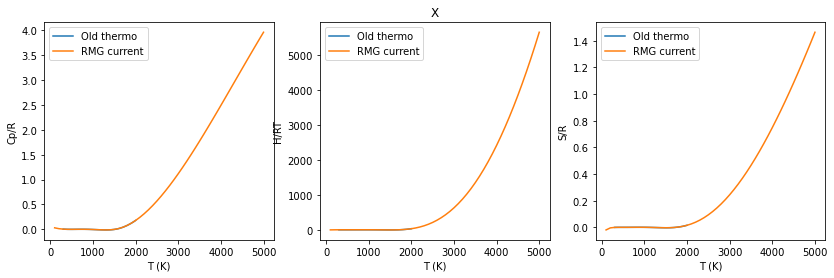

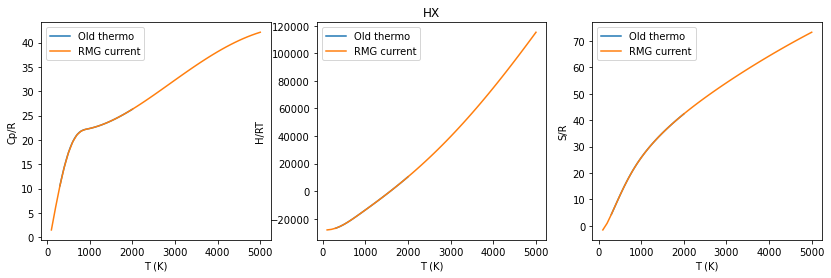

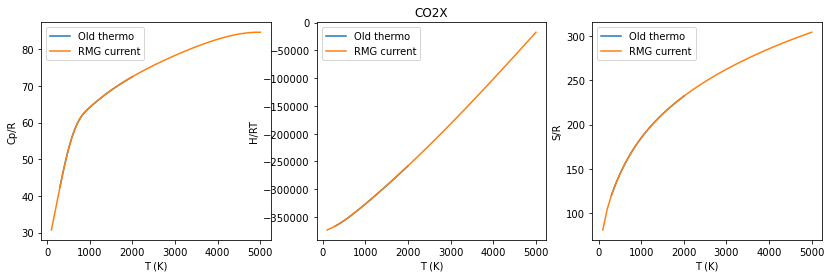

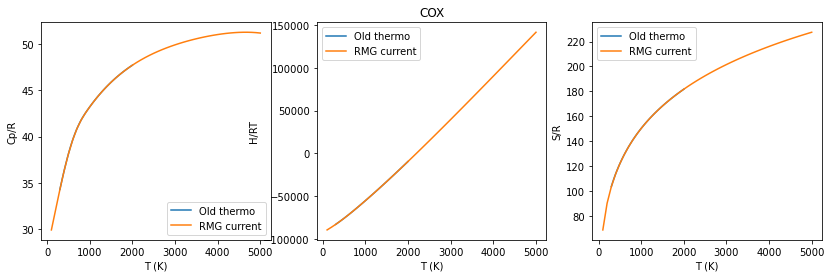

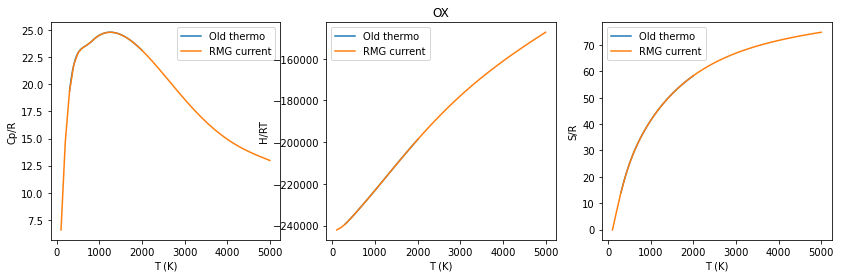

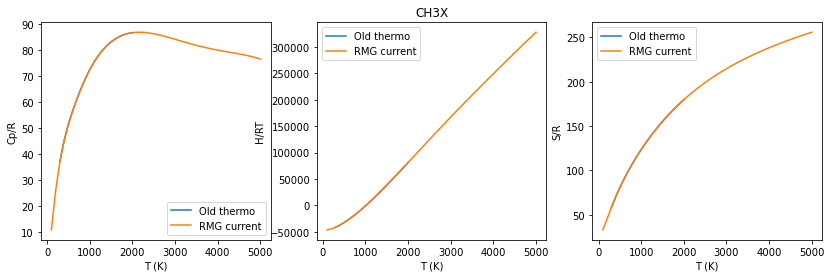

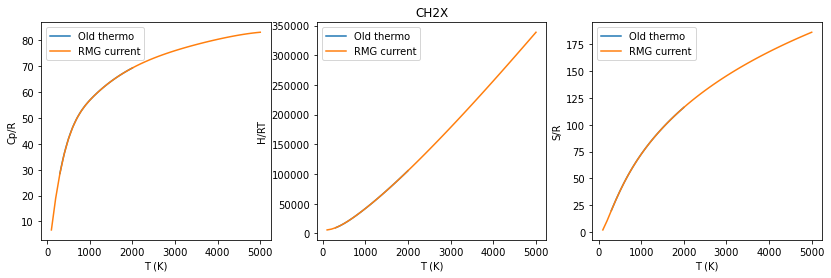

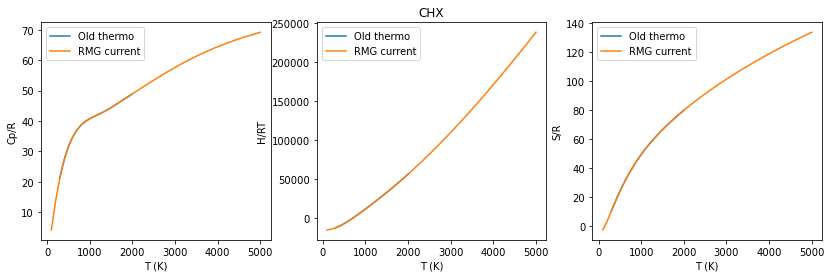

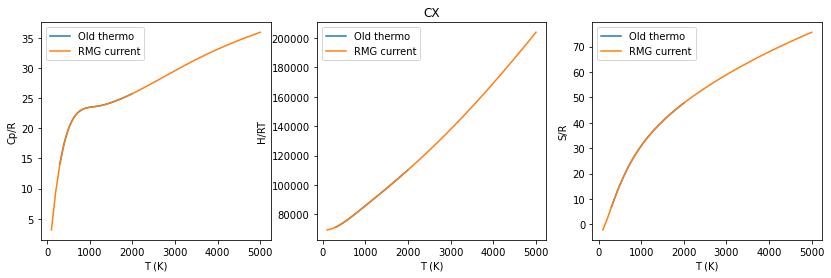

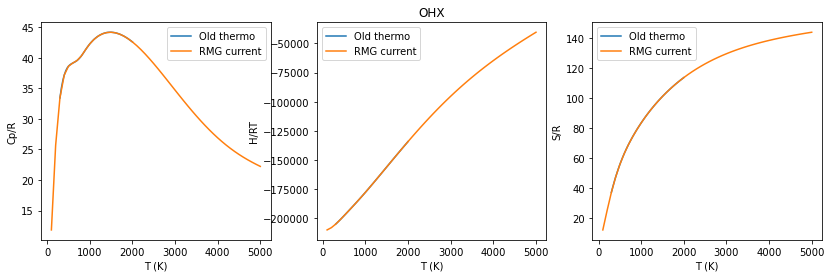

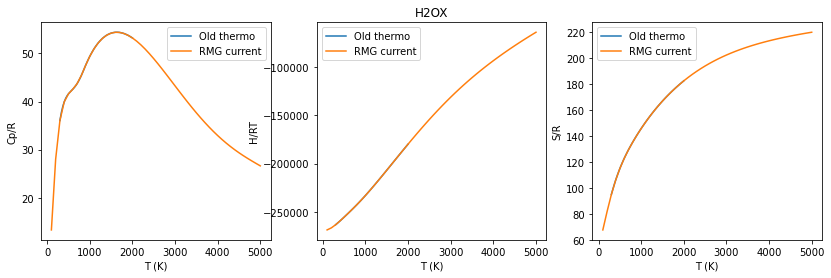

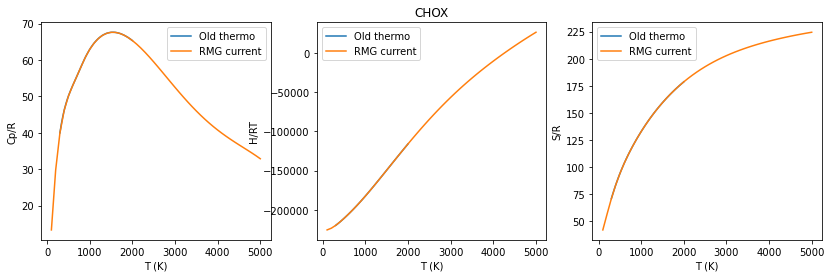

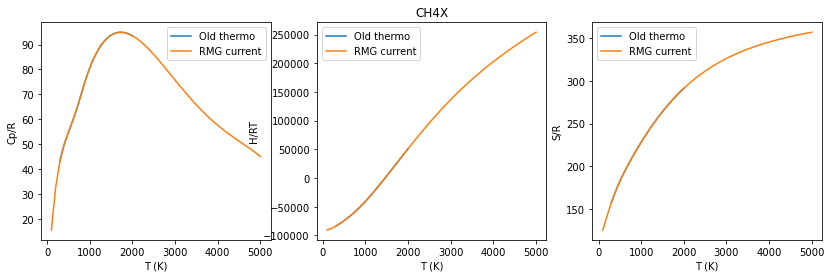

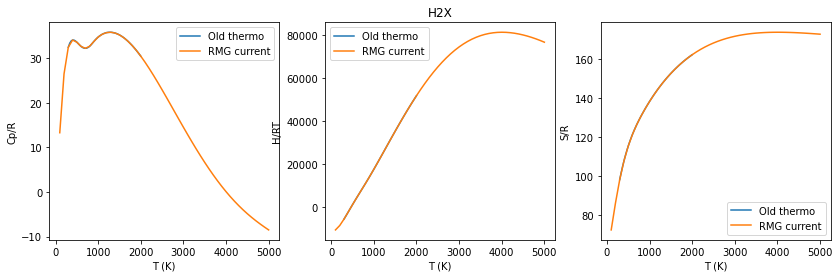

In [55]:
for species in species_old_dict:
    if species_old_dict[species].thermo:
        # deutschmann thermo
        tmin_d, tmax_d = species_old_dict[species].thermo.Tmin, species_old_dict[species].thermo.Tmax
        t_d = np.linspace(300., 2000., 50)
        Cp_d = np.linspace(0, 0, 50)
        H_d = np.linspace(0, 0, 50)
        S_d = np.linspace(0, 0, 50)
        species_old_dict[species].thermo

        for i,t in enumerate(t_d):
            Cp_d[i] = species_old_dict[species].thermo.get_heat_capacity(t)
            H_d[i] = species_old_dict[species].thermo.get_enthalpy(t)
            S_d[i] = species_old_dict[species].thermo.get_entropy(t)

        # rmg thermo
        species_rmg_dict[species]
        tmin_rmg, tmax_rmg = species_new_dict[species].thermo.Tmin, species_new_dict[species].thermo.Tmax
        t_rmg = np.linspace(tmin_rmg.value_si, tmax_rmg.value_si, 50)
        Cp_rmg = np.linspace(0, 0, 50)
        H_rmg = np.linspace(0, 0, 50)
        S_rmg = np.linspace(0, 0, 50)

        for i,t in enumerate(t_rmg):
            Cp_rmg[i] = species_new_dict[species].thermo.get_heat_capacity(t)
            H_rmg[i] = species_new_dict[species].thermo.get_enthalpy(t)
            S_rmg[i] = species_new_dict[species].thermo.get_entropy(t)

        f = plt.figure(figsize=(14,4))
        ax = f.add_subplot(131)
        ax2 = f.add_subplot(132)
        ax3 = f.add_subplot(133)
        ax.plot(t_d, Cp_d, label='Old thermo')
        ax.plot(t_rmg, Cp_rmg, label='RMG current')

        ax2.plot(t_d, H_d, label='Old thermo')
        ax2.plot(t_rmg, H_rmg, label='RMG current')
        ax3.plot(t_d, S_d, label='Old thermo')
        ax3.plot(t_rmg, S_rmg, label='RMG current')

        ax.set_xlabel('T (K)')
        ax.set_ylabel('Cp/R')
        ax.legend(loc='best')

        ax2.set_xlabel('T (K)')
        ax2.set_ylabel('H/RT')
        ax2.legend(loc='best')

        ax3.set_xlabel('T (K)')
        ax3.set_ylabel('S/R')
        ax3.legend(loc='best')

        ax2.set_title(f'{species}')
        f.savefig(f'thermo_comparison/{species}.pdf')